# Exercises in statistics

## Exercise 1

In this exercise we will use the penguins dataset (can be imported using the code `penguins_data = sns.load_dataset("penguins")`)

Please answer the following questions:
1. For the different species of penguins (Adelie, Chinstrap, and Gentoo), how many penguins are there of each species?
2. For the different species of penguins (Adelie, Chinstrap, and Gentoo), is the body mass variable normally distributed?
3. Test whether there is a difference in body mass for Adelie penguins and Chinstrap penguins. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.
4. Test whether there is a difference in body mass for Chinstrap penguins and Gentoo penguins. Remember to justify your choice of test. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd


In [2]:
penguins_data = sns.load_dataset("penguins")

In [3]:
penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### 1. For the different species of penguins (Adelie, Chinstrap, and Gentoo), how many penguins are there of each species?

In [4]:
species_counts = penguins_data['species'].value_counts()
species_counts

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

#### There is:
* Adelie: 152
* Gentoo 124
* Chinstrap 68

### 2. For the different species of penguins (Adelie, Chinstrap, and Gentoo), is the body mass variable normally distributed?

In [5]:
# Get descriptive statistics for each species
species_stats = penguins_data.groupby('species')['body_mass_g'].describe()
display(species_stats)


,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,3700.662252,458.566126,2850.0,3350.0,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,123.0,5076.016260,504.116237,3950.0,4700.0,5000.0,5500.0,6300.0


C:\Users\Jlo\AppData\Local\Temp\ipykernel_21576\2995768530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='body_mass_g', data=penguins_data, palette='Set2')


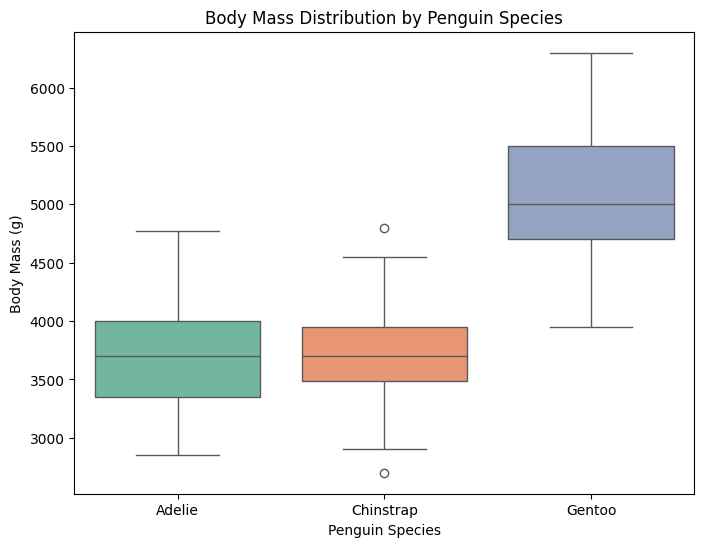

In [6]:

# Create a boxplot of body mass by species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='body_mass_g', data=penguins_data, palette='Set2')

# Add titles and labels
plt.xlabel("Penguin Species")
plt.ylabel("Body Mass (g)")
plt.title("Body Mass Distribution by Penguin Species")

# Show the plot
plt.show()


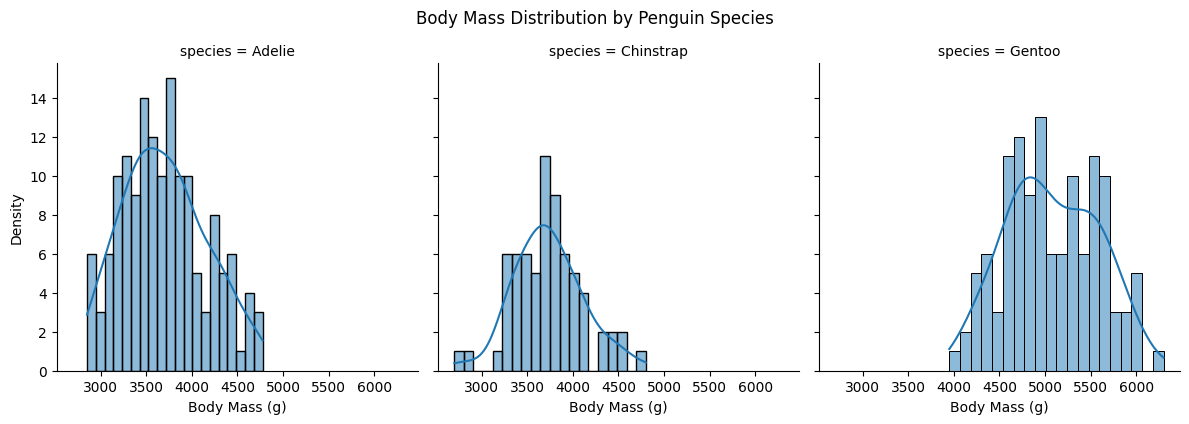

In [7]:
# Create a FacetGrid for species
g = sns.FacetGrid(penguins_data, col="species", col_wrap=3, height=4, sharex=True, sharey=True)

# Map histograms onto the grid
g.map(sns.histplot, "body_mass_g", kde=True, bins=20)

# Set titles and labels
g.set_axis_labels("Body Mass (g)", "Density")
g.figure.suptitle("Body Mass Distribution by Penguin Species", y=1.05)  # Adjust title position

# Show plot
plt.show()


#### Observations on Normality:
- **Adelie**: Slightly right-skewed, with more data points concentrated on the lower end and a longer right tail.
- **Chinstrap**: The most centered, showing a nearly normal distribution with minimal skew.
- **Gentoo**: Slight right skew, with an almost **bimodal distribution** (two peaks), suggesting possible subgroups.

One reason for these skewes could be female/male. that either uneven distruboution of them, or that there is a bigger different between them(Gentoo)
so lets try to look at that

In [8]:
# Get mean body mass per species and sex
mean_body_mass = penguins_data.groupby(['species', 'sex'])['body_mass_g'].mean().unstack()

# Display the result
display(mean_body_mass)

sex,Female,Male
species,,
Adelie,3368.835616,4043.493151
Chinstrap,3527.205882,3938.970588
Gentoo,4679.741379,5484.836066


In [9]:
# Count the number of males and females per species
gender_counts = penguins_data.groupby(['species', 'sex'])['body_mass_g'].count().unstack()

# Display the result
display(gender_counts)


sex,Female,Male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


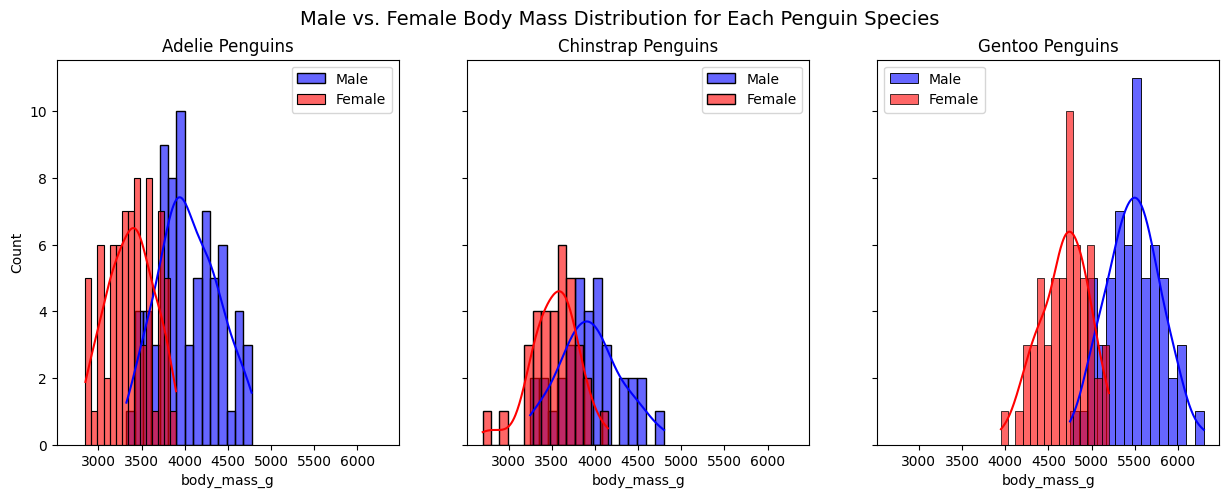

In [10]:
# Define species list
species_list = penguins_data['species'].unique()

# Create subplots (1 row, 3 columns for 3 species)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for i, species in enumerate(species_list):
    ax = axes[i]
    sns.histplot(penguins_data[(penguins_data['species'] == species) & (penguins_data['sex'] == 'Male')]['body_mass_g'], 
                 kde=True, bins=15, color='blue', label='Male', ax=ax, alpha=0.6)
    sns.histplot(penguins_data[(penguins_data['species'] == species) & (penguins_data['sex'] == 'Female')]['body_mass_g'], 
                 kde=True, bins=15, color='red', label='Female', ax=ax, alpha=0.6)

    # Titles and labels
    ax.set_title(f"{species} Penguins")
    ax.set_xlabel("body_mass_g")
    ax.set_ylabel("Count")
    ax.legend()

# Set main title
plt.suptitle("Male vs. Female Body Mass Distribution for Each Penguin Species", fontsize=14)

# Show the plot
plt.show()


In [11]:
gender_counts_with_missing = penguins_data['sex'].value_counts(dropna=False)
print(gender_counts_with_missing)

sex
Male      168
Female    165
NaN        11
Name: count, dtype: int64


In [12]:
# Count missing 'Sex' values per species
missing_sex_per_species = penguins_data[penguins_data['sex'].isna()].groupby('species').size()
print(missing_sex_per_species)

species
Adelie    6
Gentoo    5
dtype: int64


In [13]:
# Compare body mass for penguins with and without recorded sex
missing_sex_mass = penguins_data[penguins_data['sex'].isna()]['body_mass_g']
known_sex_mass = penguins_data[penguins_data['sex'].notna()]['body_mass_g']

# Display basic statistics
print("Body Mass for Penguins with Missing Sex:")
print(missing_sex_mass.describe())

print("\nBody Mass for Penguins with Known Sex:")
print(known_sex_mass.describe())


Body Mass for Penguins with Missing Sex:
count       9.000000
mean     4005.555556
std       679.358357
min      2975.000000
25%      3475.000000
50%      4100.000000
75%      4650.000000
max      4875.000000
Name: body_mass_g, dtype: float64

Body Mass for Penguins with Known Sex:
count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64


In [14]:
penguins_data_cleaned = penguins_data.dropna(subset=['sex'])

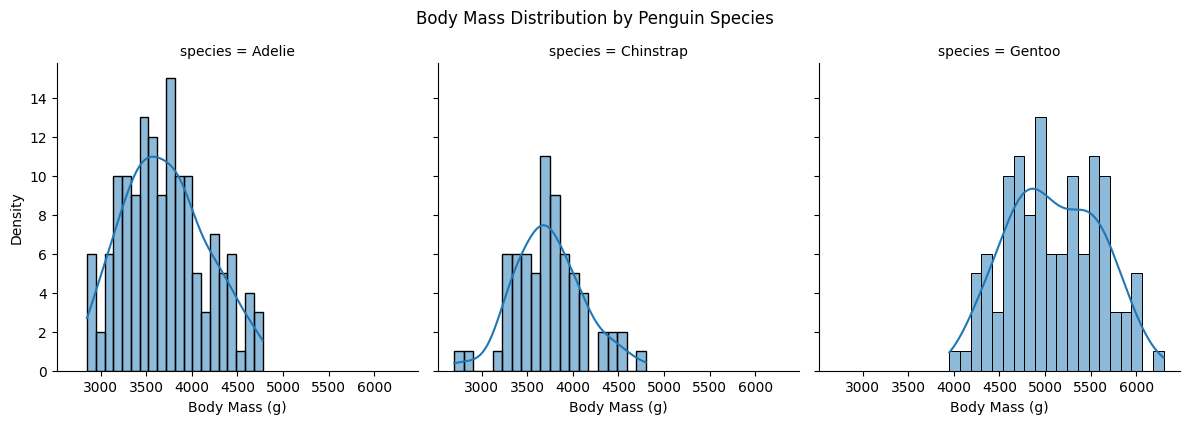

In [15]:
# Create a FacetGrid for species
g = sns.FacetGrid(penguins_data_cleaned, col="species", col_wrap=3, height=4, sharex=True, sharey=True)

# Map histograms onto the grid
g.map(sns.histplot, "body_mass_g", kde=True, bins=20)

# Set titles and labels
g.set_axis_labels("Body Mass (g)", "Density")
g.figure.suptitle("Body Mass Distribution by Penguin Species", y=1.05)  # Adjust title position

# Show plot
plt.show()

In [16]:
df = penguins_data.dropna(subset=['sex'])

In [17]:
# Count the number of penguins per species in the cleaned dataset
species_counts = df['species'].value_counts()
print(species_counts)


species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


#### we can also try to run Shapiro-Wilk Normality Test to check for normality. we have a significance level of 5. this means if p-value < 0.05, we reject the null hypothesis, meaning the data is not normally distributed.

In [18]:
# Perform the Shapiro-Wilk Normality Test for each penguin species
species_list = df['species'].unique()
shapiro_results = {}

for species in species_list:
    species_data = df[df['species'] == species]['body_mass_g'].dropna()
    stat, p_value = stats.shapiro(species_data)
    shapiro_results[species] = {"W Statistic": stat, "p-value": p_value}

# Convert results to a DataFrame for better readability
shapiro_df = pd.DataFrame.from_dict(shapiro_results, orient='index')

print(shapiro_df)


           W Statistic   p-value
Adelie        0.981161  0.042322
Chinstrap     0.984494  0.560508
Gentoo        0.986061  0.260525


#### As we can see the Adelie data is not normally disbruted for body mass in g

### 3. Test whether there is a difference in body mass for Adelie penguins and Chinstrap penguins. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.

#### Testing for a Difference in Body Mass Between Adelie and Chinstrap Penguins  

To determine whether there is a significant difference in body mass between **Adelie** and **Chinstrap** penguins, we start by defining the hypotheses:  

- **Null Hypothesis**: There is **no significant difference** in the mean body mass between Adelie and Chinstrap penguins.  
- **Alternative Hypothesis**: There **is a significant difference** in the mean body mass between Adelie and Chinstrap penguins.  

We will use a **significance level of 0.05 (5%)**. If the **p-value** is less than 0.05, we **reject the null hypothesis**, meaning there is a significant difference between the two species. If the p-value is greater than 0.05, we **fail to reject the null hypothesis**, meaning there is no significant difference in body mass.  

Since we have already conducted the **Shapiro-Wilk test for normality**, we know that **Adelie penguins body mass is not normally distributed**, while Chinstrap penguins body mass appears to be normally distributed. Because **one of the groups deviates from normality**, a **non-parametric test** is more appropriate than a parametric test like the t-test.  

For this reason, we will use the **Mann-Whitney U test (Wilcoxon Rank-Sum Test)**, which does not assume normality and is suitable for comparing two independent groups. The test will be applied to the **body mass data** of Adelie and Chinstrap penguins after removing any missing values.  

In [19]:
# Extract body mass values for Adelie and Chinstrap penguins
adelie_mass = df[df['species'] == 'Adelie']['body_mass_g'].dropna()
chinstrap_mass = df[df['species'] == 'Chinstrap']['body_mass_g'].dropna()

# Perform Mann-Whitney U Test
stat = stats.mannwhitneyu(adelie_mass, chinstrap_mass, alternative='two-sided')

print(stat)




MannwhitneyuResult(statistic=np.float64(4710.0), pvalue=np.float64(0.5476168486707566))


#### somthing about the p-value

### Test whether there is a difference in body mass for Chinstrap penguins and Gentoo penguins. Remember to justify your choice of test. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.

- **Null Hypothesis**: There is **no significant difference** in the mean body mass between Chinstrap and Gentoo penguins.  
- **Alternative Hypothesis**: There **is a significant difference** in the mean body mass between Chinstrap and Gentoo penguins.  

We will use a **significance level  of 0.05 (5%)**.  
- If **p-value < 0.05**, we **reject** (there is a significant difference).  
- If **p-value ≥ 0.05**, we **fail to reject** (no significant difference).  

Since we are comparing the body mass of Chinstrap and Gentoo penguins (two independent groups), we first checked for normality using the Shapiro-Wilk test. Both groups had p-values > 0.05, meaning they are likely normally distributed. Because of this, we used the Student’s t-test.

In [20]:
# Extract body mass values for Chinstrap and Gentoo penguins
chinstrap_mass = df[df['species'] == 'Chinstrap']['body_mass_g'].dropna()
gentoo_mass = df[df['species'] == 'Gentoo']['body_mass_g'].dropna()

# Perform Student’s t-test
stat = stats.ttest_ind(chinstrap_mass, gentoo_mass, equal_var=True)

print(stat)


TtestResult(statistic=np.float64(-19.33454832714746), pvalue=np.float64(2.781745579785546e-46), df=np.float64(185.0))


The t-test statistic = -19.33 and p-value ≈ 2.78e-46, which is far below 0.05. This means we reject the null hypothesis and conclude that there is a statistically significant difference in body mass between Chinstrap and Gentoo penguins. The large absolute t-value suggests a strong difference, making it very unlikely that this result is due to chance.

## Exercise 2

Load in the "fb_like_and_share.csv" data and answer the following questions:

1. Is there a difference in the distribution of likes for photos and videos? Justify your choice of test(s).
2. Is there a difference in the distribution of share counts for photos and videos? Justify your choice of test(s).
3. Perform an ANOVA test to test if there is a difference in means across type of posts for shares. Does it make sense to perform this ANOVA test?
4. Is there actually a statistical significant difference in the distribution of share counts for any two groups?

## Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time